# <font color='purple'>Decision Tree Classifier Building in Scikit-learn :</font>

# <font color='purple'>Importing the libraries</font>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# <font color='purple'>Importing the dataset</font>

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [5]:
df.shape

(400, 3)

In [6]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

# <font color='purple'>Splitting the dataset into the Training set and Test set</font>

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# <font color='purple'>Feature Scaling</font>

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# <font color='purple'>Training the Decision Tree Classification model on the Training set</font>

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

# <font color='purple'>Predicting a new result</font>

In [11]:
print(classifier.predict(sc.transform([[40,33000]])))

[0]


In [12]:
y_pred = classifier.predict(X_test)

# <font color='purple'>Making the Confusion Matrix</font>

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[62  6]
 [ 3 29]]


0.91

[Text(0.5416666666666666, 0.9285714285714286, 'x[0] <= 0.433\nentropy = 0.904\nsamples = 100\nvalue = [68, 32]'),
 Text(0.3055555555555556, 0.7857142857142857, 'x[1] <= 0.664\nentropy = 0.494\nsamples = 74\nvalue = [66, 8]'),
 Text(0.1111111111111111, 0.6428571428571429, 'x[0] <= -0.211\nentropy = 0.196\nsamples = 66\nvalue = [64, 2]'),
 Text(0.05555555555555555, 0.5, 'entropy = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(0.16666666666666666, 0.5, 'x[1] <= 0.244\nentropy = 0.503\nsamples = 18\nvalue = [16, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.2222222222222222, 0.35714285714285715, 'x[0] <= 0.136\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.1111111111111111, 0.21428571428571427, 'x[1] <= 0.288\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05555555555555555, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'entropy = 0.0\nsamples =

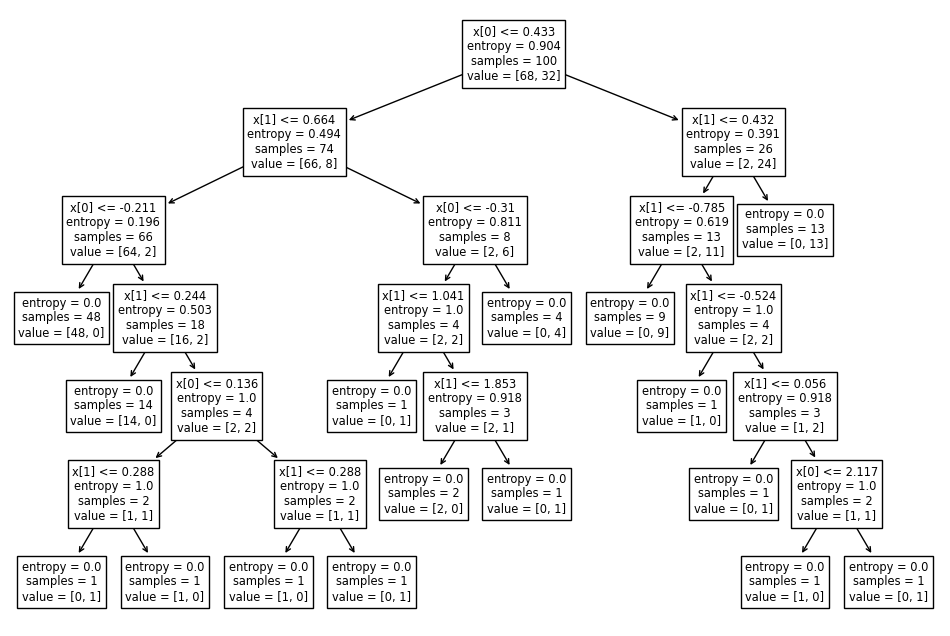

In [14]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(classifier.fit(X_test, y_test)) 

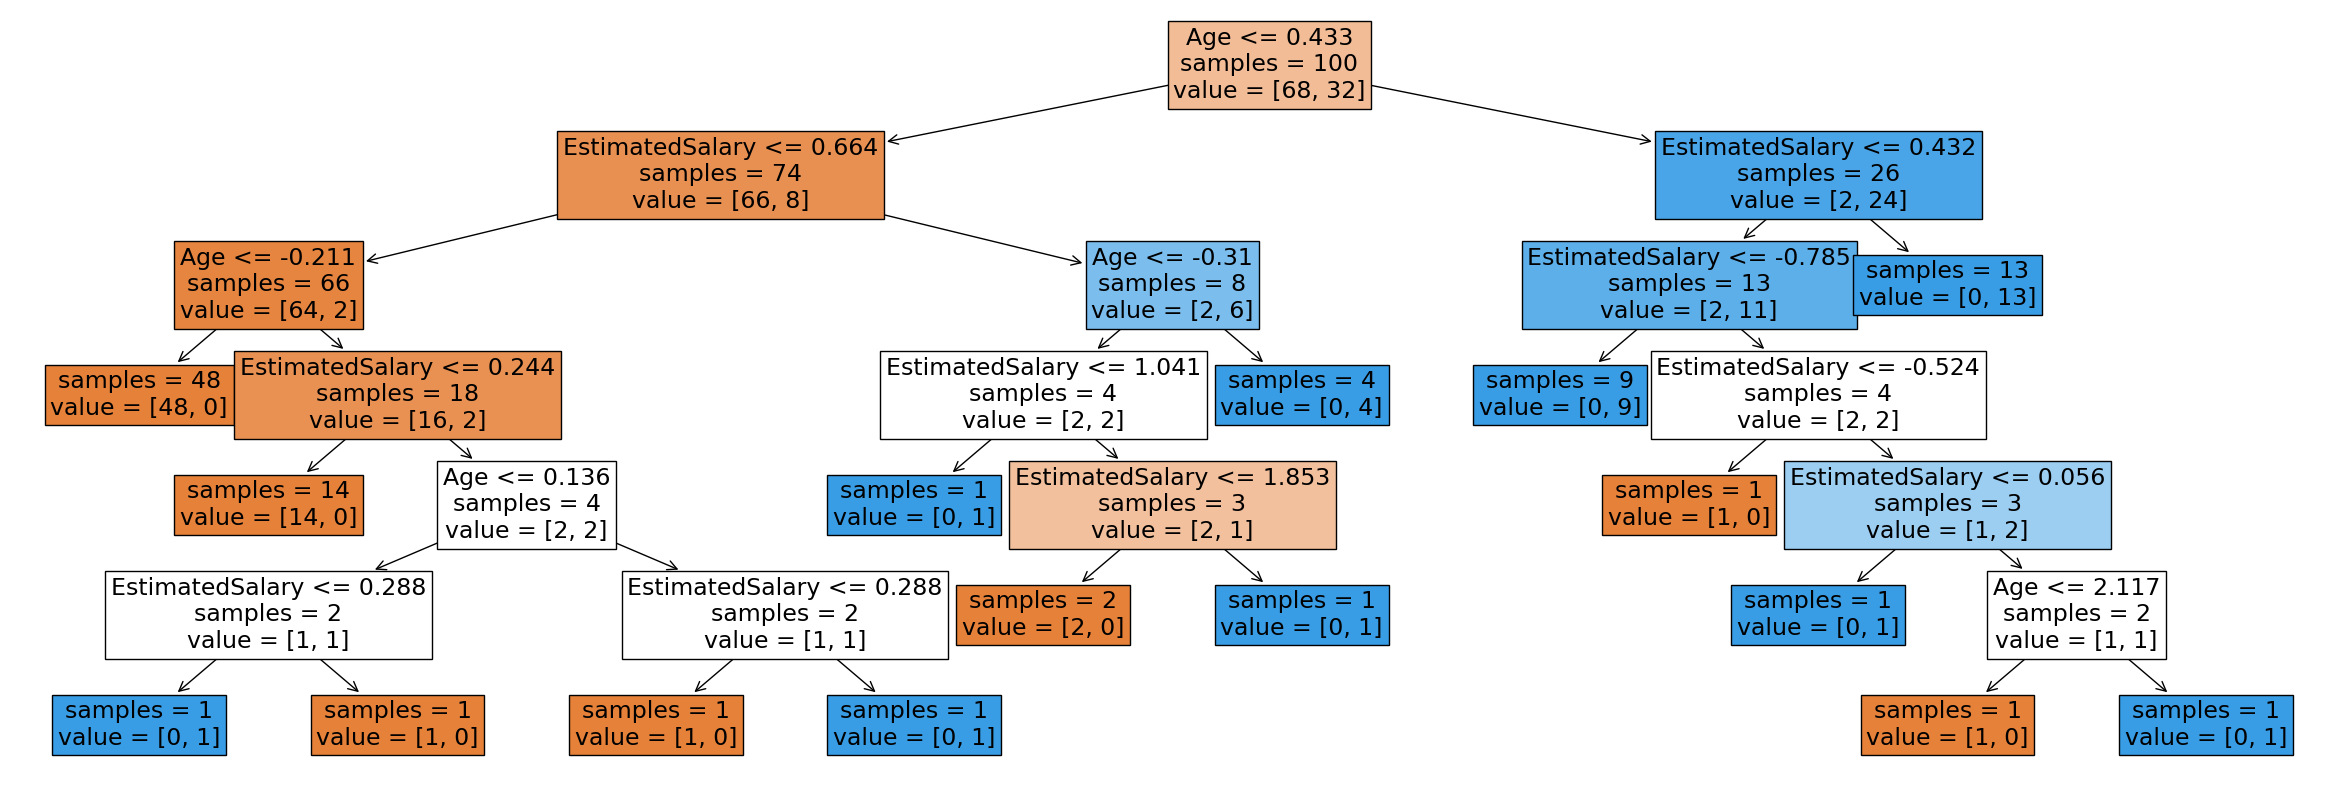

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 10))
plot_tree(
    classifier,
    feature_names=['Age',"EstimatedSalary"],
    impurity=False,
    filled=True,
    fontsize=17
)
plt.show()